In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import random

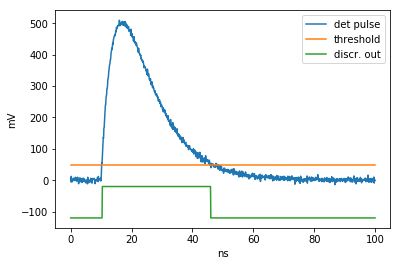

t1 : 10.315 ns, tot : 35.688 ns


In [11]:
##################################################
##             basic discriminator              ##
##################################################

t = np.linspace(0,100e-9,1000) # be sure to make not to few steps, if you have a sharp IR

Q = 200e-12
tau1 = 5e-9
tau2 = 10e-9
delay = 10e-9

det = detector_signal_function(t, Q, tau1, tau2, delay)

noise = 5e-3


hyst = 10e-3

y = det + noise*np.random.normal(size=len(t))

thresh = 50e-3

discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold")
plt.plot(t*1e9,discr*100-120,label="discr. out")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))

In [12]:
t1_list  = []
tot_list = []

for i in range(0,1000):

  y = random.random()*det + noise*np.random.normal(size=len(t))
  discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)
  t1_list  += [t1]
  tot_list += [tot]
    
t1 = np.array(t1_list)
tot = np.array(tot_list)

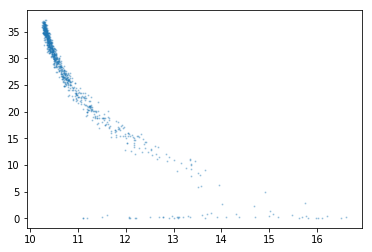

In [13]:
plt.scatter(t1*1e9,tot*1e9, s=1, alpha=0.3)